In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import normalize
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt

In [9]:
file_id = '1CwsYiq3UNMAs7iMhHeRjcs6L1eD1EIqU'
url = f'https://drive.google.com/uc?id={file_id}'

In [10]:
data = pd.read_csv(url)
data

,Id,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,1592,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1139,1593,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6
1140,1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1141,1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6


In [11]:
print(data.isnull().sum())

Id                      0
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [12]:
data = data.fillna(data.median())

In [14]:
columns = data.columns

for col in columns:
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    print(f'{col}: Lower={lower_bound}, Upper={upper_bound}')


Id: Lower=-786.75, Upper=2407.25
fixed acidity: Lower=4.1, Upper=12.1
volatile acidity: Lower=0.021250000000000047, Upper=1.01125
citric acid: Lower=-0.4049999999999999, Upper=0.9149999999999999
residual sugar: Lower=0.8499999999999996, Upper=3.6500000000000004
chlorides: Lower=0.04000000000000002, Upper=0.11999999999999998
free sulfur dioxide: Lower=-14.0, Upper=42.0
total sulfur dioxide: Lower=-39.0, Upper=121.0
density: Lower=0.9921574999999999, Upper=1.0012575
pH: Lower=2.9125000000000005, Upper=3.6925
sulphates: Lower=0.28000000000000014, Upper=0.9999999999999999
alcohol: Lower=7.1000000000000005, Upper=13.5
quality: Lower=3.5, Upper=7.5


In [15]:
for col in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']:
    lower = data[col].quantile(0.25) - 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25))
    upper = data[col].quantile(0.75) + 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25))
    outliers = data[(data[col] < lower) | (data[col] > upper)]
    print(f"{col}: {len(outliers)} outliers")


fixed acidity: 44 outliers
volatile acidity: 14 outliers
citric acid: 1 outliers
residual sugar: 110 outliers
chlorides: 77 outliers
free sulfur dioxide: 18 outliers
total sulfur dioxide: 40 outliers
density: 36 outliers
pH: 20 outliers
sulphates: 43 outliers
alcohol: 12 outliers
quality: 22 outliers


In [16]:
for col in ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol', 'quality']:
    lower = data[col].quantile(0.25) - 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25))
    upper = data[col].quantile(0.75) + 1.5 * (data[col].quantile(0.75) - data[col].quantile(0.25))
    data[col] = np.where(data[col] < lower, lower, np.where(data[col] > upper, upper, data[col]))


In [17]:
features = data.drop(columns=['quality'])
target = data['quality']

In [18]:
normalized_features = normalize(features)
normalized_df = pd.DataFrame(normalized_features, columns=features.columns)


In [19]:
normalized_df['quality'] = target

print(normalized_df.head())

         Id  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  0.000000       0.195153          0.018460     0.000000        0.050107   
1  0.013748       0.107231          0.012098     0.000000        0.035744   
2  0.034712       0.135375          0.013190     0.000694        0.039918   
3  0.046655       0.174177          0.004354     0.008709        0.029548   
4  0.104906       0.194076          0.018359     0.000000        0.049830   

   chlorides  free sulfur dioxide  total sulfur dioxide   density        pH  \
0   0.002004             0.290092              0.896647  0.026314  0.092566   
1   0.001347             0.343689              0.921088  0.013704  0.043992   
2   0.001597             0.260337              0.937212  0.017304  0.056580   
3   0.001166             0.264376              0.933090  0.015520  0.049143   
4   0.001993             0.288491              0.891699  0.026169  0.092055   

   sulphates   alcohol  quality  
0   0.014768  0.247896      

In [20]:
X = data.drop(columns=['quality'])
y = pd.get_dummies(data['quality'])

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.35, random_state=42)


In [22]:
def CrossEntropyLoss(y,y_hat):
    L_sum = np.sum(np.multiply(y, np.log(y_hat)))
    m = y.shape[1]
    L = -(1/m) * L_sum

    return L

In [23]:
class LogisticRegression:
    def __init__(self, n_class, lr, epochs, threshold=0.5):
        self.n_class = n_class
        self.lr = lr
        self.epochs = epochs
        self.threshold = threshold
        self.w = None

    def softmax(self, scores):
        max_score = np.max(scores, axis=1, keepdims=True)
        exp_scores = np.exp(scores - max_score)
        return exp_scores / np.sum(exp_scores, axis=1, keepdims=True)


    def train(self, X_train, y_train):
      self.w = np.zeros((self.n_class, X_train.shape[1]))
      accuracies = []
      for epoch in range(self.epochs):
        scores = np.dot(X_train, self.w.T)
        y_hat = self.softmax(scores)

        loss = CrossEntropyLoss(y_train.values, y_hat)

        gradient = np.dot((y_hat - y_train.values).T, X_train) / X_train.shape[0]
        self.w -= self.lr * gradient

        y_pred_train = self.predict(X_train)

        accuracy = accuracy_score(np.argmax(y_train.values, axis=1), y_pred_train) * 100

        accuracies.append(float(accuracy))

        if epoch % 10 == 0:
            print(f"Epoch {epoch+1}/{self.epochs}, Loss: {loss:.4f}, Accuracy: {accuracy:.2f}%")

      return accuracies



    def predict(self, X_test):
        scores = np.dot(X_test, self.w.T)
        y_hat = self.softmax(scores)
        y_pred = np.argmax(y_hat, axis=1)
        return y_pred

    def evaluate(self, X_test, y_test):
        y_pred = self.predict(X_test)

        y_test_labels = np.argmax(y_test.values, axis=1)

        accuracy = accuracy_score(y_test_labels, y_pred)
        f1 = f1_score(y_test_labels, y_pred, average='weighted')
        conf_matrix = confusion_matrix(y_test_labels, y_pred)

        print(f'Accuracy: {accuracy * 100:.2f}%')
        print(f'F1 Score: {f1:.2f}')
        print('Confusion Matrix:')
        print(conf_matrix)

        return accuracy, f1, conf_matrix

    def plot_accuracy_vs_epoch(self, X_train, y_train):
        accuracies = self.train(X_train, y_train)
        plt.plot(range(1, self.epochs + 1), accuracies, marker='o')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.title('Accuracy vs Epochs')
        plt.grid(True)
        plt.show()



In [24]:
def visualize_predictions(y_true, y_pred):
    plt.figure(figsize=(10, 6))
    plt.plot(y_true[:50], label='True Labels', marker='o')
    plt.plot(y_pred[:50], label='Predicted Labels', marker='x')
    plt.xlabel('Sample Index')
    plt.ylabel('Class Label')
    plt.title('True vs Predicted Labels')
    plt.legend()
    plt.show()

Epoch 1/100, Loss: 221.5809, Accuracy: 40.97%
Epoch 11/100, Loss: nan, Accuracy: 40.84%
Epoch 21/100, Loss: nan, Accuracy: 40.84%
Epoch 31/100, Loss: nan, Accuracy: 42.72%
Epoch 41/100, Loss: nan, Accuracy: 42.72%
Epoch 51/100, Loss: nan, Accuracy: 42.72%
Epoch 61/100, Loss: nan, Accuracy: 18.06%
Epoch 71/100, Loss: nan, Accuracy: 42.72%
Epoch 81/100, Loss: nan, Accuracy: 40.97%
Epoch 91/100, Loss: nan, Accuracy: 42.72%


<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: divide by zero encountered in log
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: invalid value encountered in multiply
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: divide by zero encountered in log
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: invalid value encountered in multiply
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: divide by zero encountered in log
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: invalid value encountered in multiply
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: divide by zero encountered in log
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: invali

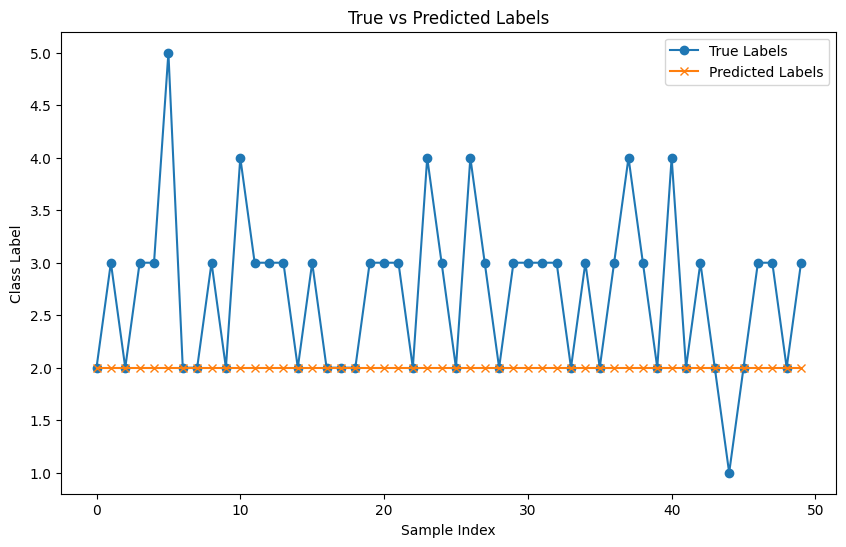

In [26]:
model = LogisticRegression(n_class=y_train.shape[1], lr=0.01, epochs=100)

model.train(X_train, y_train)

y_test_labels = np.argmax(y_test.values, axis=1)
visualize_predictions(y_test_labels, model.predict(X_test))

In [27]:
class LogisticRegression2(LogisticRegression):
    def __init__(self, n_class, lr, epochs, lambda_reg=0.01):
        super().__init__(n_class, lr, epochs)
        self.lambda_reg = lambda_reg

    def train(self, X_train, y_train):
        self.w = np.zeros((self.n_class, X_train.shape[1]))
        accuracies = []

        for epoch in range(self.epochs):
            scores = np.dot(X_train, self.w.T)
            y_hat = self.softmax(scores)

            loss = CrossEntropyLoss(y_train.values, y_hat)

            reg_loss = (self.lambda_reg / 2) * np.sum(self.w ** 2)
            total_loss = loss + reg_loss

            gradient = np.dot((y_hat - y_train.values).T, X_train) / X_train.shape[0]
            gradient += self.lambda_reg * self.w
            self.w -= self.lr * gradient

            y_pred_train = self.predict(X_train)
            accuracy = accuracy_score(np.argmax(y_train.values, axis=1), y_pred_train) * 100
            accuracies.append(float(accuracy))

            if epoch % 10 == 0:
                print(f"Epoch {epoch+1}/{self.epochs}, Loss: {total_loss:.4f}, Accuracy: {accuracy:.2f}%")

        return accuracies


In [29]:
model_improved = LogisticRegression2(n_class=y.shape[1], lr=0.1, epochs=100, lambda_reg=0.1)
accuracies_improved = model_improved.train(X_train, y_train)
accuracy_improved, f1_improved, conf_matrix_improved = model_improved.evaluate(X_test, y_test)

print("\nComparison of results:")
print(f"Baseline Model Accuracy: {model.evaluate(X_test, y_test)[0] * 100:.2f}%")
print(f"Improved Model Accuracy: {accuracy_improved * 100:.2f}%\n")

print(f"Baseline Model F1-Score: {model.evaluate(X_test, y_test)[1]:.2f}")
print(f"Improved Model F1-Score: {f1_improved:.2f}\n")

print("Baseline Confusion Matrix:")
print(model.evaluate(X_test, y_test)[2])

print("\nImproved Confusion Matrix:")
print(conf_matrix_improved)




Epoch 1/100, Loss: 221.5809, Accuracy: 40.97%
Epoch 11/100, Loss: nan, Accuracy: 40.70%
Epoch 21/100, Loss: nan, Accuracy: 40.70%
Epoch 31/100, Loss: nan, Accuracy: 42.72%
Epoch 41/100, Loss: nan, Accuracy: 42.72%
Epoch 51/100, Loss: nan, Accuracy: 23.05%
Epoch 61/100, Loss: nan, Accuracy: 14.15%
Epoch 71/100, Loss: nan, Accuracy: 42.86%
Epoch 81/100, Loss: nan, Accuracy: 41.11%
Epoch 91/100, Loss: nan, Accuracy: 40.97%
Accuracy: 43.39%
F1 Score: 0.28
Confusion Matrix:
[[  0   0   0   1   0   0]
 [  0   0   1   9   0   0]
 [  0   0   6 160   0   0]
 [  0   0   1 168   0   0]
 [  0   0   1  48   0   0]
 [  0   0   0   6   0   0]]

Comparison of results:
Accuracy: 41.40%
F1 Score: 0.24
Confusion Matrix:
[[  0   0   1   0   0   0]
 [  0   0  10   0   0   0]
 [  0   0 166   0   0   0]
 [  0   0 169   0   0   0]
 [  0   0  49   0   0   0]
 [  0   0   6   0   0   0]]
Baseline Model Accuracy: 41.40%
Improved Model Accuracy: 43.39%

Accuracy: 41.40%
F1 Score: 0.24
Confusion Matrix:
[[  0   0  

<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: divide by zero encountered in log
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: invalid value encountered in multiply
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: divide by zero encountered in log
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: invalid value encountered in multiply
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: divide by zero encountered in log
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: invalid value encountered in multiply
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: divide by zero encountered in log
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: invali

Epoch 1/100, Loss: 221.5809, Accuracy: 40.97%
Epoch 11/100, Loss: nan, Accuracy: 40.84%
Epoch 21/100, Loss: nan, Accuracy: 40.84%
Epoch 31/100, Loss: nan, Accuracy: 42.72%
Epoch 41/100, Loss: nan, Accuracy: 42.72%
Epoch 51/100, Loss: nan, Accuracy: 42.72%
Epoch 61/100, Loss: nan, Accuracy: 18.06%
Epoch 71/100, Loss: nan, Accuracy: 42.72%
Epoch 81/100, Loss: nan, Accuracy: 40.97%
Epoch 91/100, Loss: nan, Accuracy: 42.72%


<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: divide by zero encountered in log
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: invalid value encountered in multiply
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: divide by zero encountered in log
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: invalid value encountered in multiply
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: divide by zero encountered in log
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: invalid value encountered in multiply
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: divide by zero encountered in log
  L_sum = np.sum(np.multiply(y, np.log(y_hat)))
<ipython-input-22-caf5fb2502f4>:2: RuntimeWarning: invali

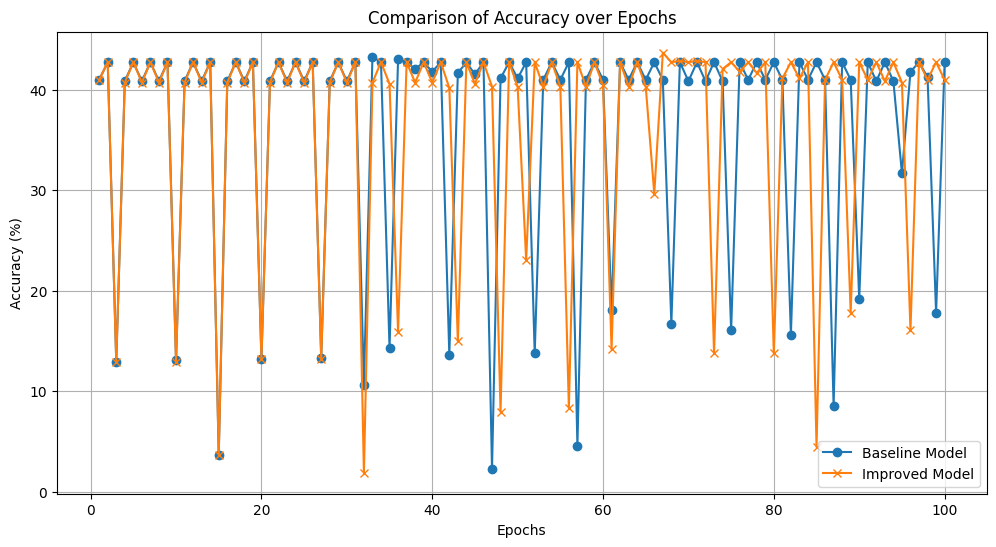

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, model.epochs + 1), model.train(X_train, y_train), label='Baseline Model', marker='o')
plt.plot(range(1, model_improved.epochs + 1), accuracies_improved, label='Improved Model', marker='x')
plt.xlabel('Epochs')
plt.ylabel('Accuracy (%)')
plt.title('Comparison of Accuracy over Epochs')
plt.legend()
plt.grid()
plt.show()